# TP 1: Introduction to Regression for Network Data Analysis

## Supervised Learning: A Quick Recap

Supervised learning is a type of machine learning where we **train a model using labeled data**.  

That means each data point has:
- An **input** (also called features)
- A known **output** (label or value)

The goal is to teach the model how to map inputs to outputs so it can make accurate predictions on unseen data.

There are two main types of supervised learning:
- **Classification**: It is used when the output is a **category or class**. In classification, the model picks a **label** from a fixed set of possible answers. (e.g. Is a network connection **normal** or **malicious**?)
- **Regression**: It is used when the output is a **number (a continuous value)**. 
In regression, the model tries to learn a formula that outputs a number — not a category. (e.g. Estimating **download time** based on file size)


## 📝 Exercise 1: Simple Linear Regression

In this first exercise, we will explore **linear regression models**, starting with a simple case where we model an output variable $y$ as a linear function of a single input feature $x$.

We will work with linear models of the form:  $y = \beta_0+\beta_1 x + \epsilon$

where:
- $\beta_0$: the **intercept** (value of $y$ when $x = 0$)  
- $\beta_1$: the **slope** (how much $y$ changes for a one-unit increase in $x$)  
- $\epsilon$: a **random error term** that accounts for noise or variability not explained by the linear relationship

This setup is the foundation of a **linear regression model**.

We assume that the random error term $\epsilon$ follows a **normal distribution** $\epsilon \sim \mathcal{N}(0,\sigma^2)$ where:

- The **mean** of the noise is zero.
- The **variance** of the noise is $\sigma^2$, so the standard deviation is $\sigma$.
- The noise is **independent** of $x$, and each observation is **i.i.d.** (independent and identically distributed).

As a means of example, let us consider the linear model: $y=b_0+b_1x+\epsilon$

with:
- $b_0 = 2$ (intercept)
- $b_1 = 3$ (slope)
- $\sigma = 30$ (standard deviation of the noise)

Note that at the end of the example, you can experiment with different values to your own choice to see how they affect the data and the fitted model.

In this case:
- $y$ is the value we **observe or measure** when the input feature takes the value $x$.
- The **sample size** (i.e., number of data points) is denoted by $n$.

### Preparation: Generating "Synthetic Data"

#### Step 1: Import Required Libraries

First, let's import the necessary libraries for data manipulation, visualization and regression modeling.

In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import statsmodels.api as sm
from sklearn import datasets, linear_model

We define the true underlying parameters of the linear model and the sample size to simulate synthetic data for regression analysis.


In [43]:
# Define parameters for synthetic data generation
n = 20 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3]) # real slope (unobserved)

#### Step 2: Define the Random Error Term ($\epsilon$)

The error term $\epsilon$ represents random noise in the data. It is sampled from a normal distribution with a specified mean and standard deviation.


In [44]:
# Mean and standard deviation for the error term
mue, sigmae = 0, 30

# Set a random seed to make results reproducible, 
# if you want to fix a 'random' vector and not have different vectors per call:
np.random.seed(199)

# Generate the error vector Er of size n
Er = np.random.normal(mue, sigmae, n)
print("Error vector (Er):", Er)

Error vector (Er): [ 33.24214448  -9.66833454  68.66231565 -55.3634741  -46.02241369
  32.69834474  36.28414203  -8.77906033 -28.89190806   6.07129635
  48.70306245 -69.33409712  31.09989668  70.21805685  -6.69218164
 -19.60951679  24.44625946 -12.92376476  -0.37686216  39.06455214]


#### Step 3: Generate the Feature Input ($x$)

We assume that $x$, our input feature, lies within an interval $[xl, xh]$. We randomly sample $n$ values from this range using a uniform distribution.

In [45]:
# Define bounds for x
xl, xh = 0, 120

# Fixing seed again
np.random.seed(199)

# Generate n values of x uniformly between xl and xh
x = np.random.uniform(xl,xh,n)
print("Input feature vector (x):", x)

Input feature vector (x): [ 78.57500336 117.84471417  47.98856377 101.29831222  55.66108205
  65.38116798  74.337341    39.82041465 117.71944956  31.32134616
 112.80089673   5.39719021  50.41908488  99.59823395  69.68557585
  13.90856407  13.01791564 107.00400554  53.31687507  64.69449614]


#### Step 4: Compute the Output Variable ($y$)

Using the linear model and the generated values of n-sized vectors Er and x, we compute the corresponding values of y.

In [46]:
# Compute y using the model
y = b0 + b1[0] * x + Er   # y = b0 + b1*x + Er
print("Output variable (y):", y)

Output variable (y): [270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]


#### Step 5: Visualize the Data

Let us plot the line $y=2+3x$ (without noise) as well as the generated points $y$ that include the error.

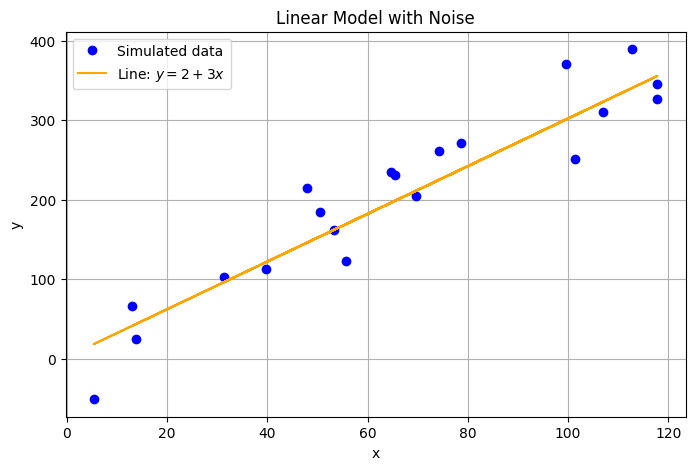

In [47]:
plt.figure(figsize=(8, 5))

plt.plot(x, y, 'o', color='blue', label='Simulated data')
plt.plot(x, b0+b1*x, color='orange',  label='Line: $y = 2 + 3x$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Model with Noise")
plt.grid(True)
plt.show()

#### Step 6: Wrap It Up Into a Function

To make the data generation process reusable, we define the function `genSample()` that creates synthetic data for both **simple** and **multiple linear regression** tasks.

- The function accepts a `seed` parameter:
  - If `seed` is set to an **integer**, the random values are reproducible — the same `x`, `y`, and `Er` vectors are generated every time.
  - If `seed` is left **empty**, the random values change with each call.


- The `size` parameter controls the number of features in the input vector `x`:
  - If `size = 1`, it generates data for **simple linear regression** (one feature).
  - If `size > 1`, it produces inputs for **multiple linear regression** (multiple features).

This structure allows you to generate controlled or randomized data for different types of regression experiments. Keep in mind that this process will be needed for later TP sessions.

In [48]:
def genSample(n, b0, b1, sigmae, xLow, xHigh, seedit=199, size=1):
    if type(seedit) == int:
        np.random.seed(seedit)
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed(seedit + k)
            x.append(np.random.uniform(xl, xh, n))
    else:
        np.random.seed()
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed()
            x.append(np.random.uniform(xl, xh, n))
        
    # Compute y
    y = b0 + Er
    for k in range(size):
        y += b1[k] * x[k]

    # Output
    if size == 1:
        return (x[0], y, Er)
    else:
        return (x, y, Er)

In [49]:
# Generate synthetic data
n, b0, b1 = 20, 2, np.array([3])
(x, y, Er) = genSample(n, b0, b1, sigmae, xl, xh, seedit=199, size=1)
print("x = ", x)
print("y = ", y)
print("Er = ", Er)

x =  [ 78.57500336 117.84471417  47.98856377 101.29831222  55.66108205
  65.38116798  74.337341    39.82041465 117.71944956  31.32134616
 112.80089673   5.39719021  50.41908488  99.59823395  69.68557585
  13.90856407  13.01791564 107.00400554  53.31687507  64.69449614]
y =  [270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]
Er =  [ 33.24214448  -9.66833454  68.66231565 -55.3634741  -46.02241369
  32.69834474  36.28414203  -8.77906033 -28.89190806   6.07129635
  48.70306245 -69.33409712  31.09989668  70.21805685  -6.69218164
 -19.60951679  24.44625946 -12.92376476  -0.37686216  39.06455214]


In [50]:
# Create a pandas DataFrame and put the x, Er, y vectors
df_slr = pd.DataFrame({'x': x, 'y': y, 'error': Er})
df_slr

,x,y,error
0,78.575003,270.967155,33.242144
1,117.844714,345.865808,-9.668335
2,47.988564,214.628007,68.662316
3,101.298312,250.531463,-55.363474
4,55.661082,122.960832,-46.022414
5,65.381168,230.841849,32.698345
6,74.337341,261.296165,36.284142
7,39.820415,112.682184,-8.779060
8,117.719450,326.266441,-28.891908
9,31.321346,102.035335,6.071296


### Part A: Analyzing synthetic data

In this part, you will analyze the synthetic dataset you generated using basic statistical tools and linear regression formulas.

You may use either `numPy` or `pandas` for your calculations.

With the above synthetic data: 

* a) Compute the sample means $\bar{x}$, $\bar{y}$ and the sample variance $s_{xx}$ and covariance $s_{xy}$ .

* b) Using the formulas presented in the lecture, calculate the estimated coefficients of the least-squares line: $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$. Compare your estimated coefficients with the **true values** used to generate the data: $(\beta_0,\beta_1)=(2,3)$ What do you observe? How close are they? What could explain any differences?

* c) Plot the regression line, least-squares line and the data samples on the same graph. Use appropriate labels and a legend to clearly distinguish each line and the data points.

**Optional:** You can later compare your results with those from `scikit-learn` implementation of simple linear regression.

#### Answer:

Mean of x: 65.98951164926079
Mean of y: 206.60995782891467
Var (s_xx): 1250.9885169632728
Cov (s_xy): 3936.735127987621
b)
Estimated slope (b1_hat): 3.1468994915667943, True slope (b1): 3
Estimated intercept (b0_hat): -1.052402828885164, True intercept (b0): 2


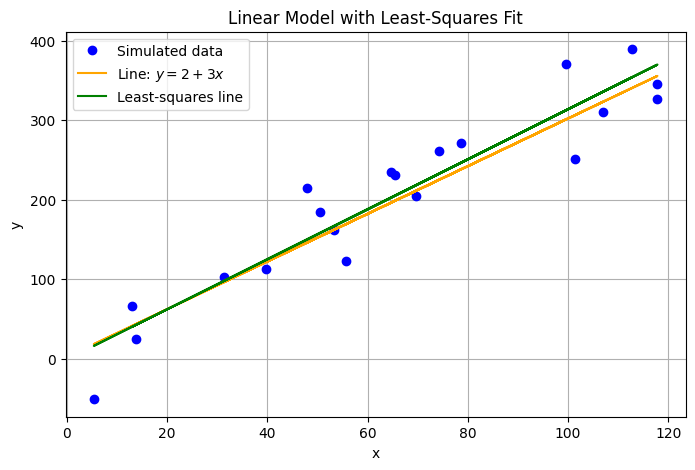

In [51]:
## TODO:
# a) Compute the sample means $\bar{x}$, $\bar{y}$ and the sample variance $s_{xx}$ and covariance $s_{xy}$ .
x_bar = np.mean(df_slr['x'])
y_bar = np.mean(df_slr['y'])
s_xx = 1/(n-1) * np.sum((df_slr['x'] - x_bar) ** 2)  # Var
s_xy = 1/(n-1) * np.sum((df_slr['x'] - x_bar) * (df_slr['y'] - y_bar)) # Cov

# Alternatively, I can use numpy's cov function:
# s_xx = np.var(df_slr['x'], ddof=1) 
# s_xy = np.cov(df_slr['x'], df_slr['y'], ddof=1)[0, 1]  

print(f"Mean of x: {x_bar}")
print(f"Mean of y: {y_bar}")
print(f"Var (s_xx): {s_xx}")
print(f"Cov (s_xy): {s_xy}")

## b) Using the formulas presented in the lecture, calculate the estimated coefficients of the least-squares line: $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$. Compare your estimated coefficients with the **true values** used to generate the data: $(\beta_0,\beta_1)=(2,3)$ What do you observe? How close are they? What could explain any differences?

b1_hat = s_xy / s_xx          # b1_hat = Cov/Var
b0_hat = y_bar - b1_hat * x_bar 

print(f"=======\nb)\nEstimated slope (b1_hat): {b1_hat}, True slope (b1): {b1[0]}")
print(f"Estimated intercept (b0_hat): {b0_hat}, True intercept (b0): {b0}")


# --> The estimated coefficients are close to the true values, but not exact (3.14689 vs 3 and -1.0524 vs 2). This discrepancy can be attributed to the random error term (Er) introduced during data generation, which adds variability to the observations.


## * c) Plot the regression line, least-squares line and the data samples on the same graph. Use appropriate labels and a legend to clearly distinguish each line and the data points.
plt.figure(figsize=(8, 5))

plt.plot(df_slr['x'], df_slr['y'], 'o', color='blue', label='Simulated data')
plt.plot(df_slr['x'], b0+b1*df_slr['x'], color='orange',  label='Line: $y = 2 + 3x$')

plt.plot(df_slr['x'], b0_hat + b1_hat*df_slr['x'], color='green', label='Least-squares line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Model with Least-Squares Fit")
plt.grid(True)
plt.show()


### Part B: Visualizing data distribution

In this section, you'll explore the distribution of the input feature $x$ using visual tools. You can use either `matplotlib` or `pandas` for this part.

* d) Create a boxplot of the variable $x$ to examine its distribution. This will help you identify the spread, central tendency and possible outliers.

* e) Based on the boxplot, how would you describe the distribution of $x$? Symmetric, left-skewed, right-skewed or uniform?

* f) What does the interquartile range (IQR) tell you about the spread of $x$ values?

* g) Are there any outliers in the feature $x$ based on the boxplot? What would cause them to appear or not appear in a asynthetic dataset like this?

#### Answer:

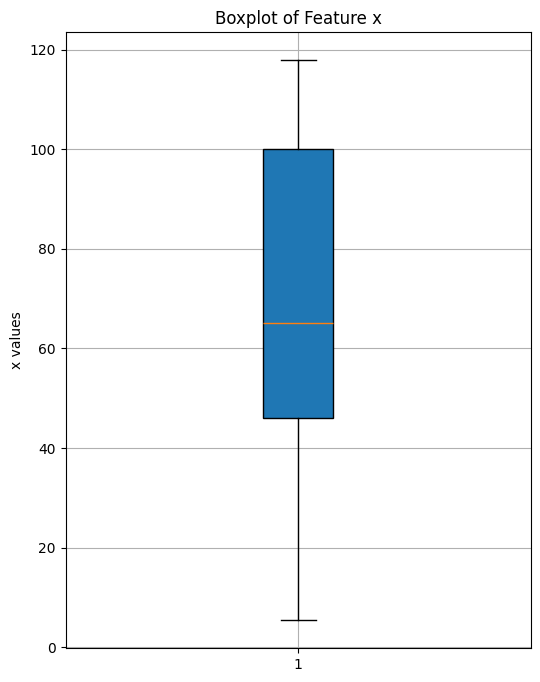

In [52]:
## TODO:

# d) Create a boxplot of the variable $x$ to examine its distribution. This will help you identify the spread, central tendency and possible outliers.

plt.figure(figsize=(6, 8))
plt.boxplot(df_slr['x'], vert=True, patch_artist=True)
plt.title("Boxplot of Feature x")
plt.ylabel("x values")
plt.grid(True)
plt.show()

In [53]:
from scipy.stats import skew
print("Skewness:", skew(df_slr['x']))

Skewness: -0.06181796846136678


##### e) Based on the boxplot, how would you describe the distribution of $x$? Symmetric, left-skewed, right-skewed or uniform?
- The boxplot of x appears to be relatively left-skewed. (Skewness < 0)
- The median is near the center of the box, and the whiskers are approximately equal in length on both sides.
- There are no outliers, and the spread of the data seems consistent with a uniform distribution, as expected from the uniform random generation of x values between 0 and 120.

##### f) What does the interquartile range (IQR) tell you about the spread of $x$ values?
- The IQR is the range between the first quartile (Q1) and the third quartile (Q3).
- In this case, the IQR is approximately 55 (45 to 100), indicating that the middle 50% of the x values are spread over a range of 55 units.

##### g) Are there any outliers in the feature $x$ based on the boxplot? What would cause them to appear or not appear in a synthetic dataset like this?
- There are no outliers in the boxplot of x.
- In a synthetic dataset generated from a uniform distribution, outliers are less likely to appear because the values are evenly distributed across the specified range (0 to 120 in this case).

### Part C: Evaluating Model Accuracy

In this section, you will assess how well your regression model fits the synthetic data using standard evaluation metrics. These metrics help quantify the accuracy and reliability of your predictions.

* h) Compute the Residual Standard Error (RSE) and the Mean Squared Error (MSE). What do they tell about the accuracy of the model?

* **Reminder:** The relationship between MSE and RSE is given by: $MSE := \frac{1}{n}RSS = \frac{n-2}{n}RSE^2$.

* i) Compute the coefficient of determination ($R^2$-statistic). What does it tell about the accuracy of the model?

* j) Calculate the $95\%$ confidence intervals for the estimated coefficients. Do the real coefficients $\beta_0=2$ and $\beta_1=3$ fall within these intervals?

**Optional:** You may compare your manually calculated metrics and intervals with those obtained using `scikit-learn`'s `LinearRegression` implementation.

#### Answer:

In [54]:
## TODO:
# In this section, you will assess how well your regression model fits the synthetic data using standard evaluation metrics. These metrics help quantify the accuracy and reliability of your predictions.

# * h) Compute the Residual Standard Error (RSE) and the Mean Squared Error (MSE). What do they tell about the accuracy of the model?
y_hat = b1_hat * df_slr['x'] + b0_hat
RSS = np.sum((df_slr['y'] - y_hat) ** 2)  
RSE = math.sqrt(RSS / (n - 2))
MSE = RSS / n

print("RSE: ", RSE)
print("MSE: ", MSE)

# --> The RSE and MSE values indicate the average deviation of the observed values from the predicted values. Lower values suggest a better fit, while higher values indicate more significant discrepancies between the model's predictions and the actual data points.

# i) Compute the coefficient of determination ($R^2$-statistic). What does it tell about the accuracy of the model?
s_yy = 1/(n-1) * np.sum((df_slr['y'] - y_bar) ** 2)
R_squared = s_xy**2 / (s_xx * s_yy)
print("R^2: ", R_squared)

# --> The R^2 value of approximately 0.891 indicates that about 89.1% of the variance in the dependent variable (y) can be explained by the independent variable (x) using the linear regression model. This suggests a strong relationship between x and y, indicating that the model fits the data well.

# j) Calculate the $95\%$ confidence intervals for the estimated coefficients. Do the real coefficients $\beta_0=2$ and $\beta_1=3$ fall within these intervals?
import scipy.stats as stats
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-2)
se_b1_test = RSE / math.sqrt(np.sum((df_slr['x'] - x_bar) ** 2))
se_b0_test = RSE * math.sqrt(1/n + (x_bar**2) / np.sum((df_slr['x'] - x_bar) ** 2))
ci_b1 = (b1_hat - t_critical * se_b1_test, b1_hat + t_critical * se_b1_test)
ci_b0 = (b0_hat - t_critical * se_b0_test, b0_hat + t_critical * se_b0_test)
print(f"95% CI for b1_hat: {ci_b1}, True b1: {b1[0]}")
print(f"95% CI for b0_hat: {ci_b0}, True b0: {b0}")


print("=======\n\n")
# Compute standard errors
se_b1 = RSE / math.sqrt((n - 1) * s_xx)
se_b0 = RSE * math.sqrt(1 / n + (x_bar ** 2) / ((n - 1) * s_xx))

# Critical t-value for 95% confidence (two-tailed)
t_crit = stats.t.ppf(0.975, df=n-2)

# Confidence intervals
ci_b0_lower = b0_hat - t_crit * se_b0
ci_b0_upper = b0_hat + t_crit * se_b0
ci_b1_lower = b1_hat - t_crit * se_b1
ci_b1_upper = b1_hat + t_crit * se_b1

print("95% CI for b_0: ", (ci_b0_lower, ci_b0_upper))
print("95% CI for b_1: ", (ci_b1_lower, ci_b1_upper))

# Check if real coefficients fall within the intervals
beta0_real = 2
beta1_real = 3
falls_b0 = ci_b0_lower <= beta0_real <= ci_b0_upper
falls_b1 = ci_b1_lower <= beta1_real <= ci_b1_upper

print("Does b_0=2 fall within the CI? ", falls_b0)
print("Does b_1=3 fall within the CI? ", falls_b1)

RSE:  40.02266221186426
MSE:  1441.6321414724885
R^2:  0.8908740377860238
95% CI for b1_hat: (np.float64(2.6015028635213495), np.float64(3.692296119612239)), True b1: 3
95% CI for b0_hat: (np.float64(-41.65810568638809), np.float64(39.55330002861776)), True b0: 2


95% CI for b_0:  (np.float64(-41.65810568638809), np.float64(39.55330002861776))
95% CI for b_1:  (np.float64(2.6015028635213495), np.float64(3.692296119612239))
Does b_0=2 fall within the CI?  True
Does b_1=3 fall within the CI?  True


## 📝 Exercise 2: Multiple Linear Regression

In this exercise, we will extend simple linear regression to a **multi-variable setting**. Specifically, we work on problems of multi-linear regression with multiple input features and examine how each input feature contributes to predicting the output variable.

We work with a multiple linear regression model using 4 input features. 

The regression model is: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \epsilon$

where:
- $x_1$, $x_2$, $x_3$ are features that influence $y$
- $x_4$ is constructed as noise: $x_4=np.ones(n)+Er$, meaning it should not have any true effect on the target $y$.

### Step 1: Generate Synthetic Data

We use the `genSample()` function again to simulate a dataset with multiple features. You can adjust the number of features via the `size` parameter.

- The model is still based on: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_d x_d + \varepsilon$
- We'll use a fixed seed for reproducibility.
- The noise term $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ adds randomness, simulating real-world measurement error.

In [55]:
# Define parameters for synthetic data generation
n = 100 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3, 7, 20])   # real slope (unobserved) for 3 input features
xl, xh = 0, 120 # input range for features
sigmae = 30 # standard deviation for error term

In [56]:
# Generate synthetic data using the true model and added Gaussian noise
(xM,yM,ErM) = genSample(n, b0, b1, sigmae, xl, xh, seedit=199, size=len(b1))
x_extra = 1 + ErM   # This variable has no real meaning, just noise centered around 1
xM.append(x_extra)  # Now xM has 4 features: [x1, x2, x3, x_extra]
yM += xM[-1]        # Modify yM so x_extra appears to influence y

### Step 2: Visualize Data

We collect the generated features, target variable, and noise into a structured format using a `pandas.DataFrame`.

In [57]:
# Create a structured DataFrame for visual inspection
dataM = {'x1': xM[0], 'x2' : xM[1],'x3' : xM[2] ,'x4': xM[3], 'error': ErM, 'y_mult': yM}
df_slrM = pd.DataFrame(data=dataM)
df_slrM

,x1,x2,x3,x4,error,y_mult
0,78.575003,113.715871,13.668552,34.242144,33.242144,1374.591433
1,117.844714,27.185691,89.745699,-8.668335,-9.668335,2322.411282
2,47.988564,71.330417,73.327127,69.662316,68.662316,2250.145793
3,101.298312,51.397042,97.163016,-54.363474,-55.363474,2499.207612
4,55.661082,91.696882,85.542899,-45.022414,-46.022414,2430.674574
...,...,...,...,...,...,...
95,8.854235,61.968206,60.400340,20.917828,19.917828,1711.182607
96,25.821316,81.436553,113.898221,49.849389,48.849389,3026.183015
97,28.996218,8.222232,1.510316,4.260805,3.260805,184.272200
98,45.852941,104.255477,104.346202,23.016888,22.016888,3001.304969


### Step 3: Analysis & Interpretation of Regression Results

Now that you’ve generated and organized the synthetic dataset, analyze the statistical properties of the regression models and understand the role of each input feature.

* a) For the above multi-regression model, estimate the unknown regression coefficients $(\beta_0,...,\beta_4)$ using all four features. Also compute the p-values, F-statistic and $R^2$ score for each feature. What do the p-values and F-statistic tell you about which features are truly significant?

* b) Fit a multi-regression model only using $(x_2,x_4)$. Estimate the coefficients and determine the p-values, F-statistic and $R^2$ score again. How do the p-values and F-statistic compare with results from part (a)? What does this imply? Are all the features relevant to the model?

* c) Fit four seperate single-feature regression models (one for each variable $x_i$). Compare the estimated slopes $\beta_1$, $\ldots$, $\beta_4$ from these single-variable models to those from the multi-variable model in part (a). What do you notice?

* d) Compare the answers from (a), (b), (c). What do you observe? Explain.

**Hint 1:** Use `LinearRegression()` from `scikit-learn` and create a linear regression object.

**Hint 2:** For the p-values and the F-statistic, you can use the scikit-learn command `sklearn.feature_selection.f_regression`

scikit documnetation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

#### Answer:

Here is the answer for part (a) using `statsmodels`, you need to do it with `scikit-learn`.

In [58]:
# using pandas
Xm = df_slrM[["x1", "x2", "x3", "x4"]]
Ym = df_slrM["y_mult"]
Xm = sm.add_constant(Xm) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Ym, Xm).fit()
y_pred_OLS = model.predict(Xm) # make the predictions using SAME train data

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_mult   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.219e+31
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:31:20   Log-Likelihood:                 2614.5
No. Observations:                 100   AIC:                            -5219.
Df Residuals:                      95   BIC:                            -5206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   3.43e-13   2.91e+12      0.000       1.000       1.000
x1             3.0000   3.19e-15   9.42e+14      0.000       3.000       3.000
x2             7.0000   3.03e-15   2.31e+15      0.000       7.000       7.000
x3            20.0000   3.11e-15   6.43e+15      0.000      20.000      20.000
x4             2.0000   3.69e-15   5.42e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                        4.160   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.394
Skew:                           0.132   Prob(JB):                        0.302
Kurtosis:                       2.289   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# a)
X_a = df_slrM[["x1", "x2", "x3", "x4"]]
y = df_slrM["y_mult"]

model_a = LinearRegression().fit(X_a, y)
intercept_a = model_a.intercept_ # B0
coef_a = model_a.coef_     # B1, B2, B3, B4

r2_a = model_a.score(X_a, y)  # R^2

F_a, p_values_a = f_regression(X_a, y)

print("Intercept (B0):", intercept_a)
print("Coefficients (B1, B2, B3, B4):", coef_a)
print("R^2:", r2_a)
print("F-statistics:", F_a)
print("p-values:", p_values_a)


Intercept (B0): 0.9999999999986358
Coefficients (B1, B2, B3, B4): [ 3.  7. 20.  2.]
R^2: 1.0
F-statistics: [3.05020455e+00 1.28893175e+01 6.51847108e+02 1.15579041e-04]
p-values: [8.38602784e-02 5.18371247e-04 4.27953400e-45 9.91444148e-01]


##### a) What do the p-values and F-statistic tell you about which features are truly significant?
- The p-values for x1, x2, and x3 are all below the common significance level of 0.05, indicating that these features are statistically significant predictors of the target variable y.
- The p-value for x4 is very high (0.991), suggesting that x4 is not a significant predictor of y.
- The F-statistics for x1, x2, and x3 are relatively high, indicating that these features contribute significantly to explaining the variance in y. In contrast, the F-statistic for x4 is very low, further confirming that x4 does not have a meaningful impact on y.
- Overall, x1, x2, and x3 are significant features in the model, while x4 is not.

In [60]:
# b)
X_b = df_slrM[["x2", "x4"]]

model_b = LinearRegression().fit(X_b, y)
intercept_b = model_b.intercept_ # B0
coef_b = model_b.coef_     # B2, B4

r2_b = model_b.score(X_b, y)  # R^2
F_b, p_values_b = f_regression(X_b, y)

print("Intercept (B0):", intercept_b)
print("Coefficients (B2, B4):", coef_b)
print("R^2:", r2_b)
print("F-statistics:", F_b)
print("p-values:", p_values_b)


Intercept (B0): 1381.274536362085
Coefficients (B2, B4): [7.21117134 0.18219491]
R^2: 0.11628643238312242
F-statistics: [1.28893175e+01 1.15579041e-04]
p-values: [5.18371247e-04 9.91444148e-01]


In [61]:
# c)
for feature in ["x1", "x2", "x3", "x4"]:
  X_c = df_slrM[[feature]]

  model_c = LinearRegression().fit(X_c, y)
  intercept_c = model_c.intercept_ # B0
  coef_c = model_c.coef_     # B1 or B2 or B3 or B4
  r2_c = model_c.score(X_c, y)  # R^2

  F_c, p_values_c = f_regression(X_c, y)
  print(f"Feature: {feature}")
  print("Intercept (B0):", intercept_c)
  print("Coefficient:", coef_c)
  print("R^2:", r2_c)
  print("F-statistics:", F_c)
  print("p-values:", p_values_c)
  print("-----")

Feature: x1
Intercept (B0): 1629.9452272739652
Coefficient: [3.85258665]
R^2: 0.030185040861935852
F-statistics: [3.05020455]
p-values: [0.08386028]
-----
Feature: x2
Intercept (B0): 1381.9515541633968
Coefficient: [7.20755779]
R^2: 0.11623588049332667
F-statistics: [12.88931745]
p-values: [0.00051837]
-----
Feature: x3
Intercept (B0): 626.2816712287522
Coefficient: [20.13003568]
R^2: 0.8693066906996278
F-statistics: [651.84710789]
p-values: [4.279534e-45]
-----
Feature: x4
Intercept (B0): 1851.4510773563738
Coefficient: [-0.02782072]
R^2: 1.1793765781753507e-06
F-statistics: [0.00011558]
p-values: [0.99144415]
-----


## 📝 Exercise 3: Univariate Linear Regression with Real Network Data

In this final exercise, we will apply a simple linear regression to a real-world dataset related to network traffic. 

The goal is to:
- Load and explore a dataset
- Select one numerical feature to predict a target variable
- Train a linear regression model using **scikit-learn**
- Visualize and interpret the results

We will use tools provided in the course library and analyze actual features from network measurements.

### Dataset Overview: Requet Dataset

We use a dataset of QoE prediction from [Requet dataset](https://github.com/Wimnet/RequetDataSet) — a public dataset designed for **real-time QoE detection** on encrypted YouTube traffic.
- The goal is to predict QoE indicators, such as video resolution, based on traffic characteristics.
- The dataset has already been cleaned and simplified for this lab exercise.

### Step 1: Import Libraries

Start by importing the libraries needed for data handling, modeling and visualization.

In [62]:
# Import necessary libraries
import pandas as pd # For dataframes (tables)
import numpy as np
import matplotlib.pyplot as plt # For plots
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load the Dataset

Make sure your dataset is accessible. This example assumes a file named `network_data.csv` is in the working directory. 

* a) Replace the filename with your actual path to the dataset.

##### Answer:

In [63]:
# TODO:
filename = "./network_data.csv"
df = pd.read_csv(filename)

In [64]:
# Preview the dataset
df=df.rename(columns={'label':'Resolution'})
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,Resolution
0,0.4,14,14,5351,12894,192.168.1.190,173.194.55.23,0,0,0,...,0,0,1520324862555,0.000,861.841,0.000,0.000000,-1,12.894,NoQualityInfo
1,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,...,0,1520324868397,1520324862555,0.008,861.841,4.454,0.005177,true,79.344,q480p
2,2.2,18,21,2967,21708,192.168.1.190,74.125.155.199,0,0,0,...,0,0,1521147316421,0.000,817.841,0.000,0.000000,-1,21.708,NoQualityInfo
3,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,...,0,1521147321127,1521147316421,0.007,817.841,3.955,0.004844,true,52.973,q360p
4,0.1,18,20,2320,13466,192.168.1.190,173.194.54.236,0,0,0,...,0,0,1520279002790,0.000,638.981,0.000,0.000000,-1,13.466,NoQualityInfo


In [65]:
# Get some insight on data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 200 columns):
 #    Column             Dtype  
---   ------             -----  
 0    RelativeTime       float64
 1    PacketsSent        int64  
 2    PacketsReceived    int64  
 3    BytesSent          int64  
 4    BytesReceived      int64  
 5    IPSrc0             object 
 6    IPDst0             object 
 7    Protocol0          object 
 8    PacketsSent0       int64  
 9    PacketsReceived0   int64  
 10   BytesSent0         int64  
 11   BytesReceived0     int64  
 12   IPSrc1             object 
 13   IPDst1             object 
 14   Protocol1          object 
 15   PacketsSent1       int64  
 16   PacketsReceived1   int64  
 17   BytesSent1         int64  
 18   BytesReceived1     int64  
 19   IPSrc2             object 
 20   IPDst2             object 
 21   Protocol2          object 
 22   PacketsSent2       int64  
 23   PacketsReceived2   int64  
 24   BytesSent2         int64  
 

### Step 3: Select Features for Univariate Linear Regression

**Goal**: Build a univariate linear regression model to predict the value of `Resolution` based on a single input feature: `KBytesReceived`.

In supervised learning, we need to distinguish between:

* **Independent variable $X$** – the input feature used to predict an outcome : `KBytesReceived`
* **Dependent variable $y$** – the value we are trying to predict (also called the target): `Resolution`

In [66]:
# Selecting one feature and target
X = df[['KBytesReceived']]   # Independent variable (needs to be 2D for scikit-learn)
y = df['Resolution']         # Dependent variable

### Step 4: Visualizing the Data with Scatter Plot

Before training the model, it's helpful to visualize the relationship between the input feature and the target variable. A scatter plot lets us see if a linear relationship might exist between `KBytesReceived` and `Resolution`.

**Optional:** Learn more about plotting with Matplotlib see [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html).

* b) Create a scatter plot showing `KBytesReceived` vs `Resolution` and save it as "scatter_plot.pdf" under the working directory.

#### Answer:

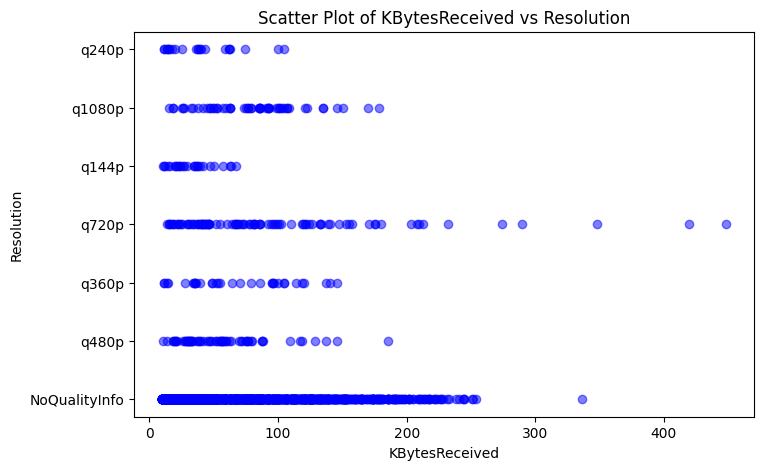

In [67]:
## TODO:
# b) 

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("KBytesReceived")
plt.ylabel("Resolution")
plt.title("Scatter Plot of KBytesReceived vs Resolution")
plt.savefig("scatter_plot.pdf")
plt.show()



### Step 5: Manually Creating a Simple Regression Model

Before using a machine learning library, let’s build a very simple regression model "by hand" to understand the concept.

* c) Without using any machine learning libraries, define a simple linear model to predict `Resolution` from `KBytesReceived`. Choose a slope value of 1.

#### Answer:

In [68]:
# Kiểm tra dtype và unique values của y
print("Dtype of y:", y.dtype)
print("Unique values in Resolution:", y.unique())
print("unique:", len(y.unique()))

Dtype of y: object
Unique values in Resolution: ['NoQualityInfo' 'q480p' 'q360p' 'q720p' 'q144p' 'q1080p' 'q240p']
unique: 7


In [69]:
resolution_map = {
    'NoQualityInfo': 0,
    'q144p': 1,
    'q240p': 2,
    'q360p': 3,
    'q480p': 4,
    'q720p': 5,
    'q1080p': 6
}

# Apply mapping and convert to numeric
df['Resolution_numeric'] = df['Resolution'].map(resolution_map).astype(float)

y = df['Resolution_numeric']

In [70]:
## TODO:
# c)
## Linear regression model: y = B1*x + B0 + error_term
mean_x = np.mean(X["KBytesReceived"])
mean_y = np.mean(y)

slope = 1

# Across the mean point
intercept = mean_y - slope * mean_x 

y_pred_manual = slope * X['KBytesReceived'] + intercept
print(f"Manual Linear Model: Resolution = {slope} * KBytesReceived + {intercept:.2f}")

mse_manual = np.mean((y - y_pred_manual) ** 2)
print(f"Manual MSE: {mse_manual:.2f}")

Manual Linear Model: Resolution = 1 * KBytesReceived + -59.73
Manual MSE: 2794.91


* d) Plot the resulting line over your earlier scatter plot to visually assess the fit. Save the new plot as `scatter_plot2.pdf`

#### Answer:

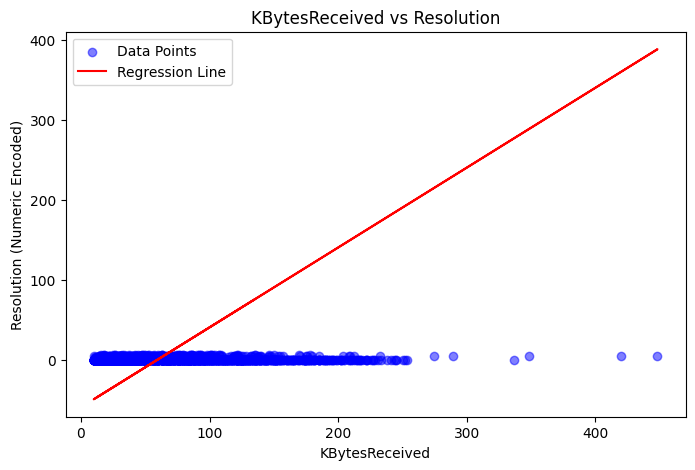

In [71]:
## TODO:
plt.figure(figsize=(8, 5))
plt.scatter(X['KBytesReceived'], y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X['KBytesReceived'], y_pred_manual, color='red', label='Regression Line')
plt.xlabel("KBytesReceived")
plt.ylabel("Resolution (Numeric Encoded)")
plt.title("KBytesReceived vs Resolution")
plt.legend()
plt.savefig("manual_regression_plot.pdf")
plt.show()



### Step 6: Train a Linear Regression Model Using Scikit-learn

Now that you've tried defining a model manually, let's use supervised learning to train a regression model that automatically finds the best slope (and intercept) to fit the data.

We'll use **Ordinary Least Squares (OLS)** — the most common type of linear regression — from `scikit-learn`.

* e) Create the regression model. 
    * **Hint:** Use `LinearRegression()` from `sklearn.linear_model`.

#### Answer:

In [72]:
## TODO:
model = LinearRegression()


* f) Fit the model using your full dataset. 
    * **Hint:** Use `.fit(...)`.

#### Answer:

In [73]:
## TODO:
model.fit(X, y)


LinearRegression()

* g) Predict the output for a range of input values. 
    * **Hint:** Use `.predict(...)` on your model.

#### Answer:

In [74]:
## TODO:
x_range = np.linspace(X['KBytesReceived'].min(), X['KBytesReceived'].max(), 100).reshape(-1, 1)  # 2D for predict
y_pred_range = model.predict(x_range)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


* h) Plot the model’s predictions on top of your scatter plot. 
    * **Hint:** Use `ax.plot(...)` and add a legend with `ax.legend()`.

#### Answer:

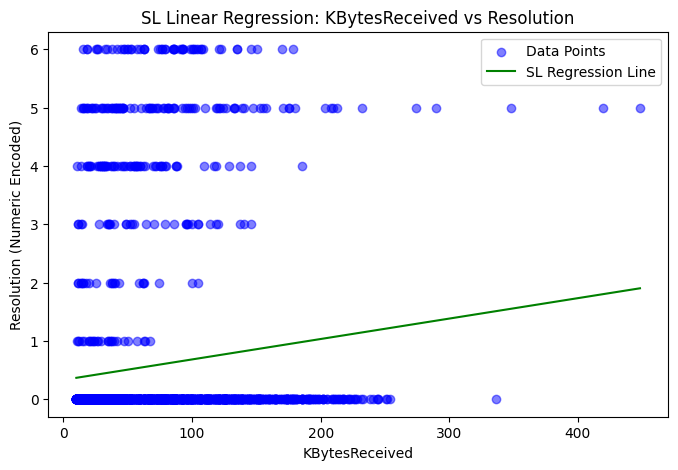

In [75]:
## TODO:
plt.figure(figsize=(8, 5))
plt.scatter(X['KBytesReceived'], y, color='blue', alpha=0.5, label='Data Points')  # Scatter từ data
plt.plot(x_range, y_pred_range, color='green', label='SL Regression Line')  # Line từ predictions
plt.xlabel("KBytesReceived")
plt.ylabel("Resolution (Numeric Encoded)")
plt.title("SL Linear Regression: KBytesReceived vs Resolution")
plt.legend()
plt.show()

* i) Print the learned model parameters: the intercept and slope. 
    * **Hint:** Use `.intercept_` and `.coef_ attributes` of the model.

#### Answer:

In [76]:
## TODO:
print("Learned Intercept (β0):", model.intercept_)
print("Learned Slope (β1):", model.coef_[0])  # coef_ :  array, take [0] for univariate

y_pred_full = model.predict(X)  # Predictions on full data
mse_sklearn = mean_squared_error(y, y_pred_full)
r2_sklearn = r2_score(y, y_pred_full)
print(f"Scikit-Learn MSE: {mse_sklearn:.2f}")
print(f"Scikit-Learn R²: {r2_sklearn:.2f}")

Learned Intercept (β0): 0.33199172937614063
Learned Slope (β1): 0.003501051141886122
Scikit-Learn MSE: 2.22
Scikit-Learn R²: 0.02


* j) Save the final figure as `final_figure.pdf`. 
    * **Hint:** Use `fig.savefig(...)`.

#### Answer:

In [77]:
## TODO:
plt.savefig("final_figure.pdf")

<Figure size 640x480 with 0 Axes>